In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<h2 align = 'center' style = 'color:blue'>Data Loading</h2>

In [2]:
df_cust = pd.read_csv('datasets/customers.csv')
df_loan = pd.read_csv('datasets/loans.csv')
df_bureau = pd.read_csv('datasets/bureau_data.csv')

In [3]:
df_cust.shape, df_loan.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_cust.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [5]:
df_loan.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [6]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [7]:
df = pd.merge(df_cust, df_loan, on = 'cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [8]:
df = pd.merge(df, df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [9]:
df.shape

(50000, 33)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [11]:
df['default'] = df['default'].astype(int)
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [12]:
df['disbursal_date'] = pd.to_datetime(df['disbursal_date'])
df['installment_start_dt'] = pd.to_datetime(df['installment_start_dt'])

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['default'])  # All features except 'target'
y = df['default'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
df_train = pd.concat([X_train, y_train], axis = 'columns')
df_test = pd.concat([X_test, y_test], axis = 'columns')

In [15]:
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,0
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,0
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-08-25,2019-09-19,2,1,83,14,78,4,83,0
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,2020-04-16,2020-05-05,1,1,37,0,0,5,34,0
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2024-01-26,2024-02-17,2,0,62,6,28,5,19,0


In [16]:
df_test.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
33553,C33554,36,F,Married,Self-Employed,3373000,3,Owned,15,Hyderabad,...,2022-11-30,2022-12-21,2,2,70,3,27,5,12,0
9427,C09428,33,F,Single,Salaried,2725000,0,Owned,15,Jaipur,...,2020-07-02,2020-07-15,4,0,115,0,0,9,85,0
199,C00200,28,M,Single,Self-Employed,1071000,0,Owned,19,Delhi,...,2019-07-31,2019-08-02,4,1,144,0,0,4,72,0
12447,C12448,28,M,Married,Salaried,1183000,3,Rented,4,Delhi,...,2020-10-20,2020-10-31,3,2,93,0,0,4,90,0
39489,C39490,52,M,Married,Self-Employed,2079000,2,Owned,26,Pune,...,2023-07-05,2023-08-02,4,2,152,20,105,9,53,0


<h2 align = 'center' style='color:blue'>EDA</h2>

## Data Cleaning

In [17]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [18]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [19]:
df_train['residence_type'] = df_train['residence_type'].fillna('Owned')

In [20]:
df_train['residence_type'].isna().sum()

np.int64(0)

In [21]:
df_train.duplicated()

27434    False
13400    False
883      False
7303     False
45124    False
         ...  
11284    False
44732    False
38158    False
860      False
15795    False
Length: 37500, dtype: bool

In [22]:
df_train.drop_duplicates()
df_train.duplicated().sum()

np.int64(0)

In [23]:
continuous_columns = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

In [24]:
categorical_columns = ['default', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type']

## Outlier Detection

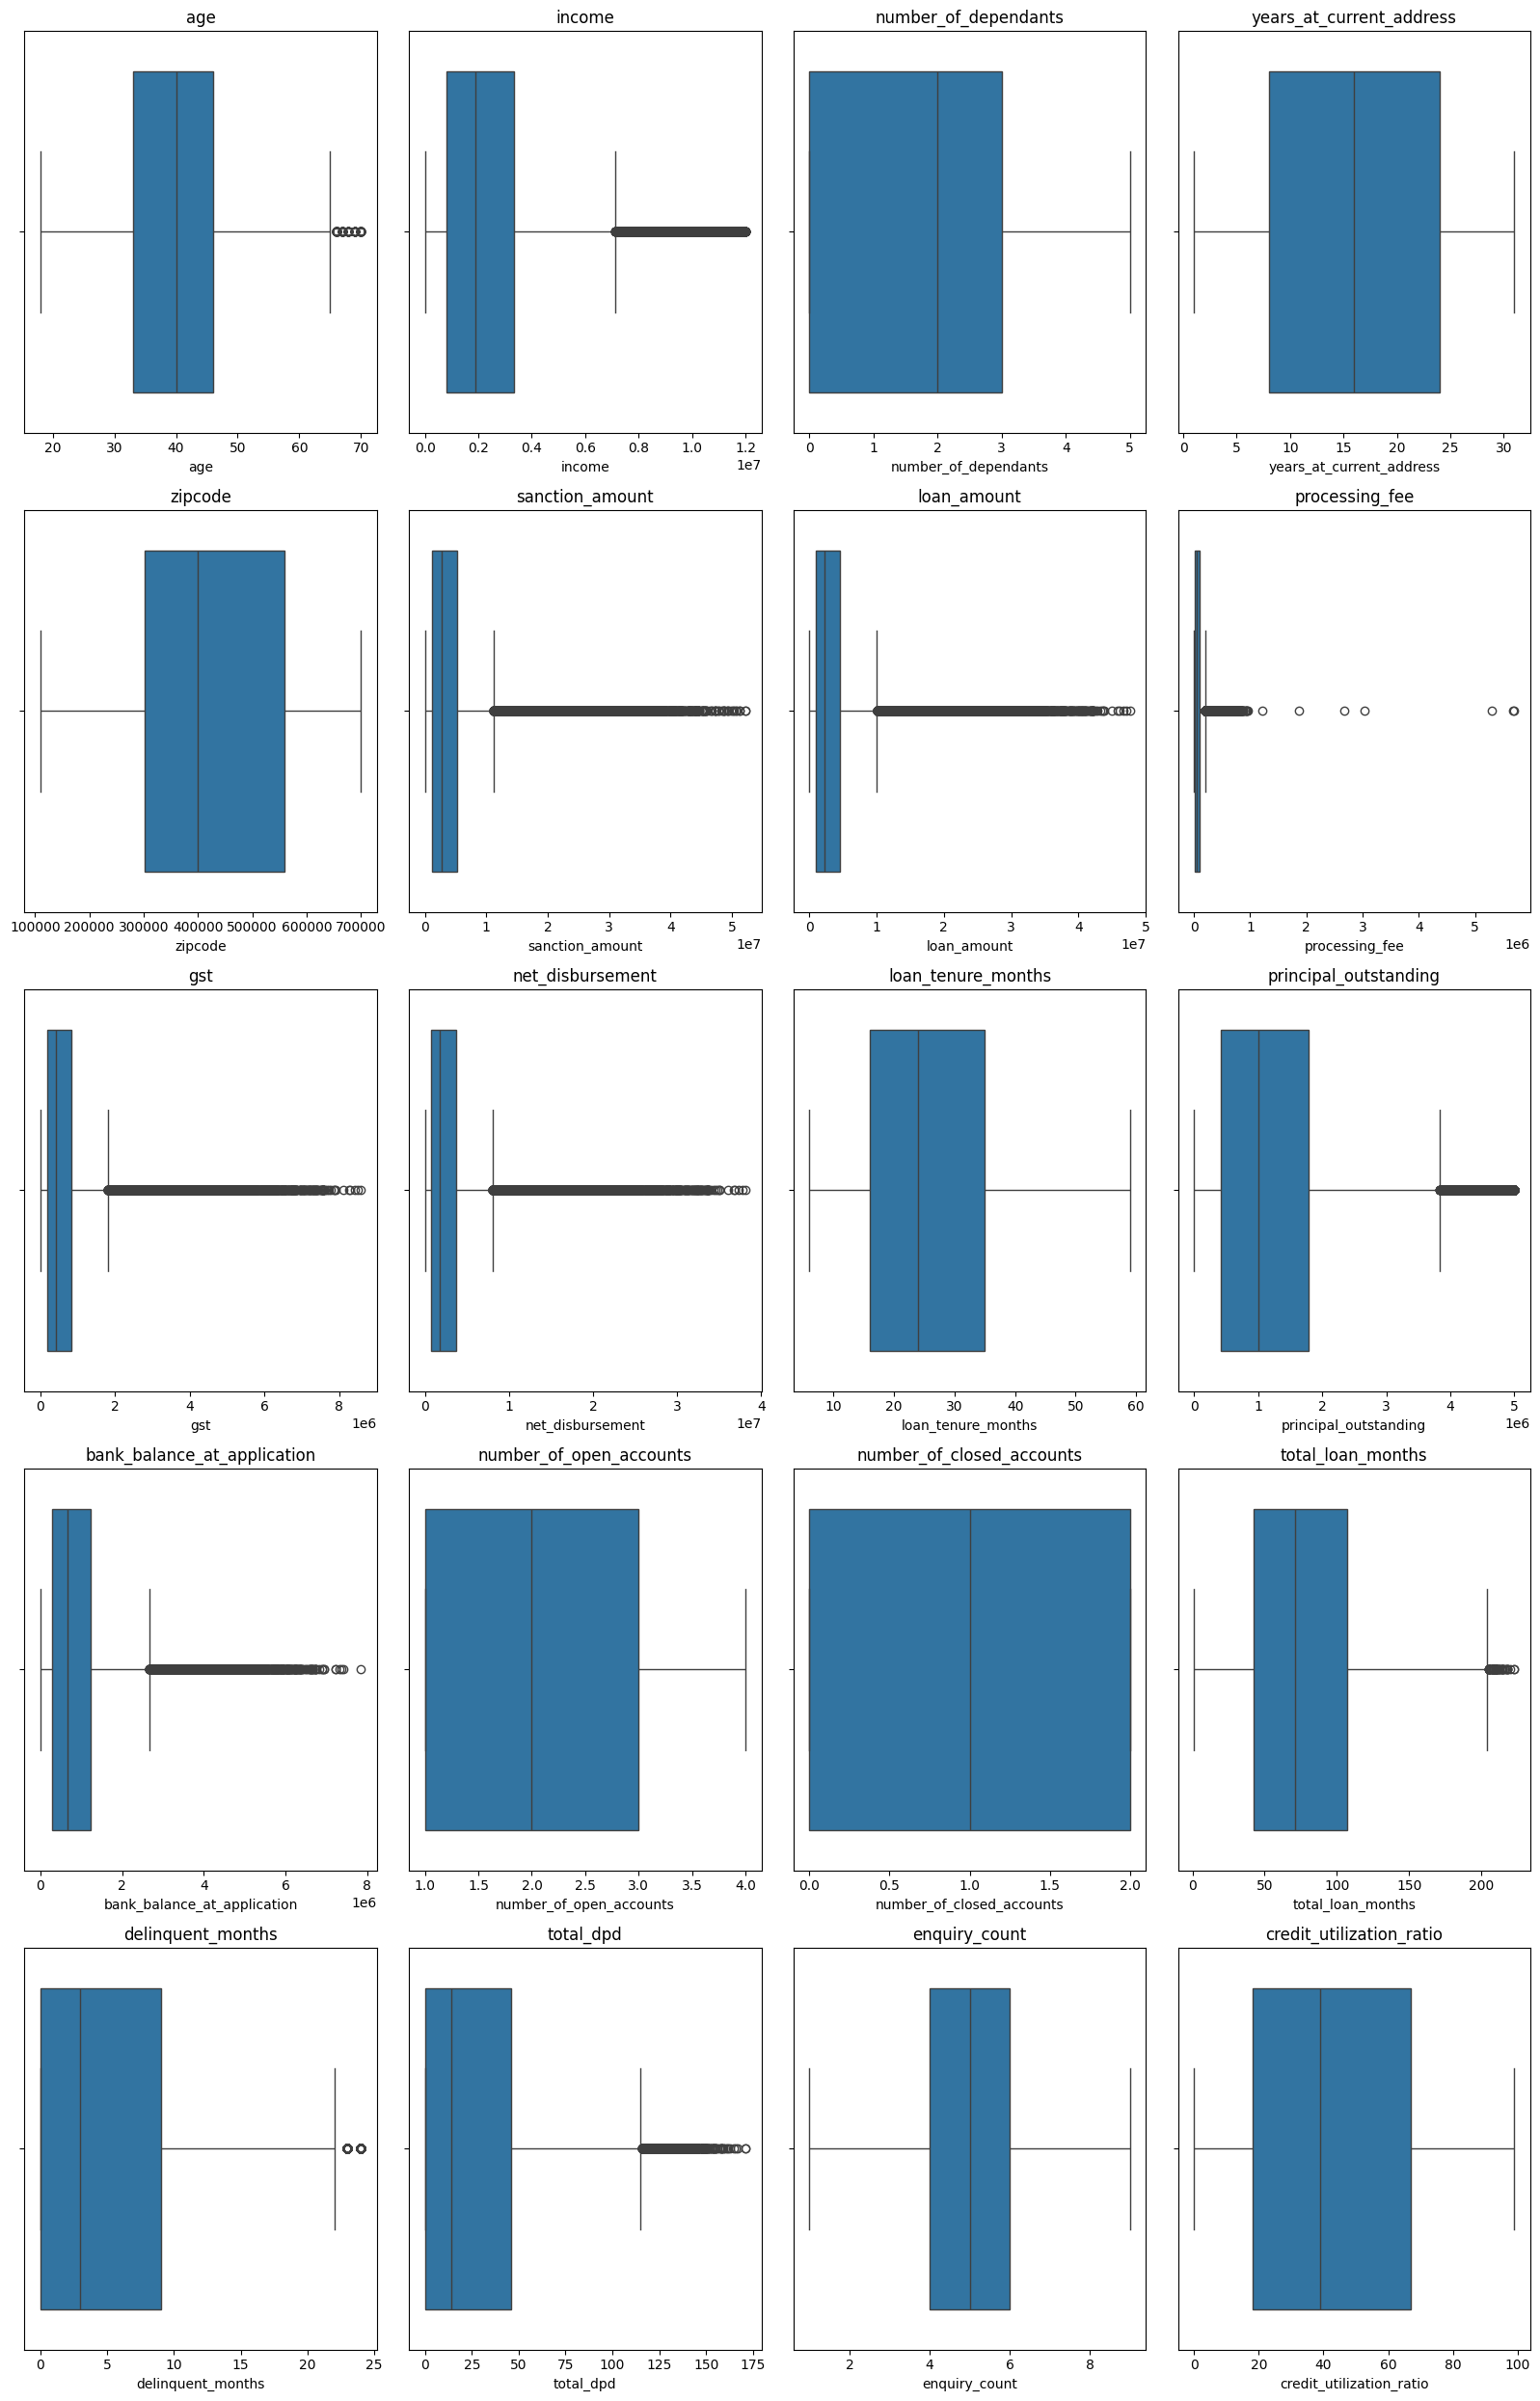

In [25]:
n_cols = 4
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Set up the matplotlib figure
plt.figure(figsize=(16, 5 * n_rows))

# Loop through the continuous columns and create a box plot for each
for i, column in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each column
    sns.boxplot(x=df_train[column])  # Create boxplot
    plt.title(column)  # Set title for each subplot
    plt.xlabel(column)  # Set x-label

# Adjust layout
plt.tight_layout()
plt.show()

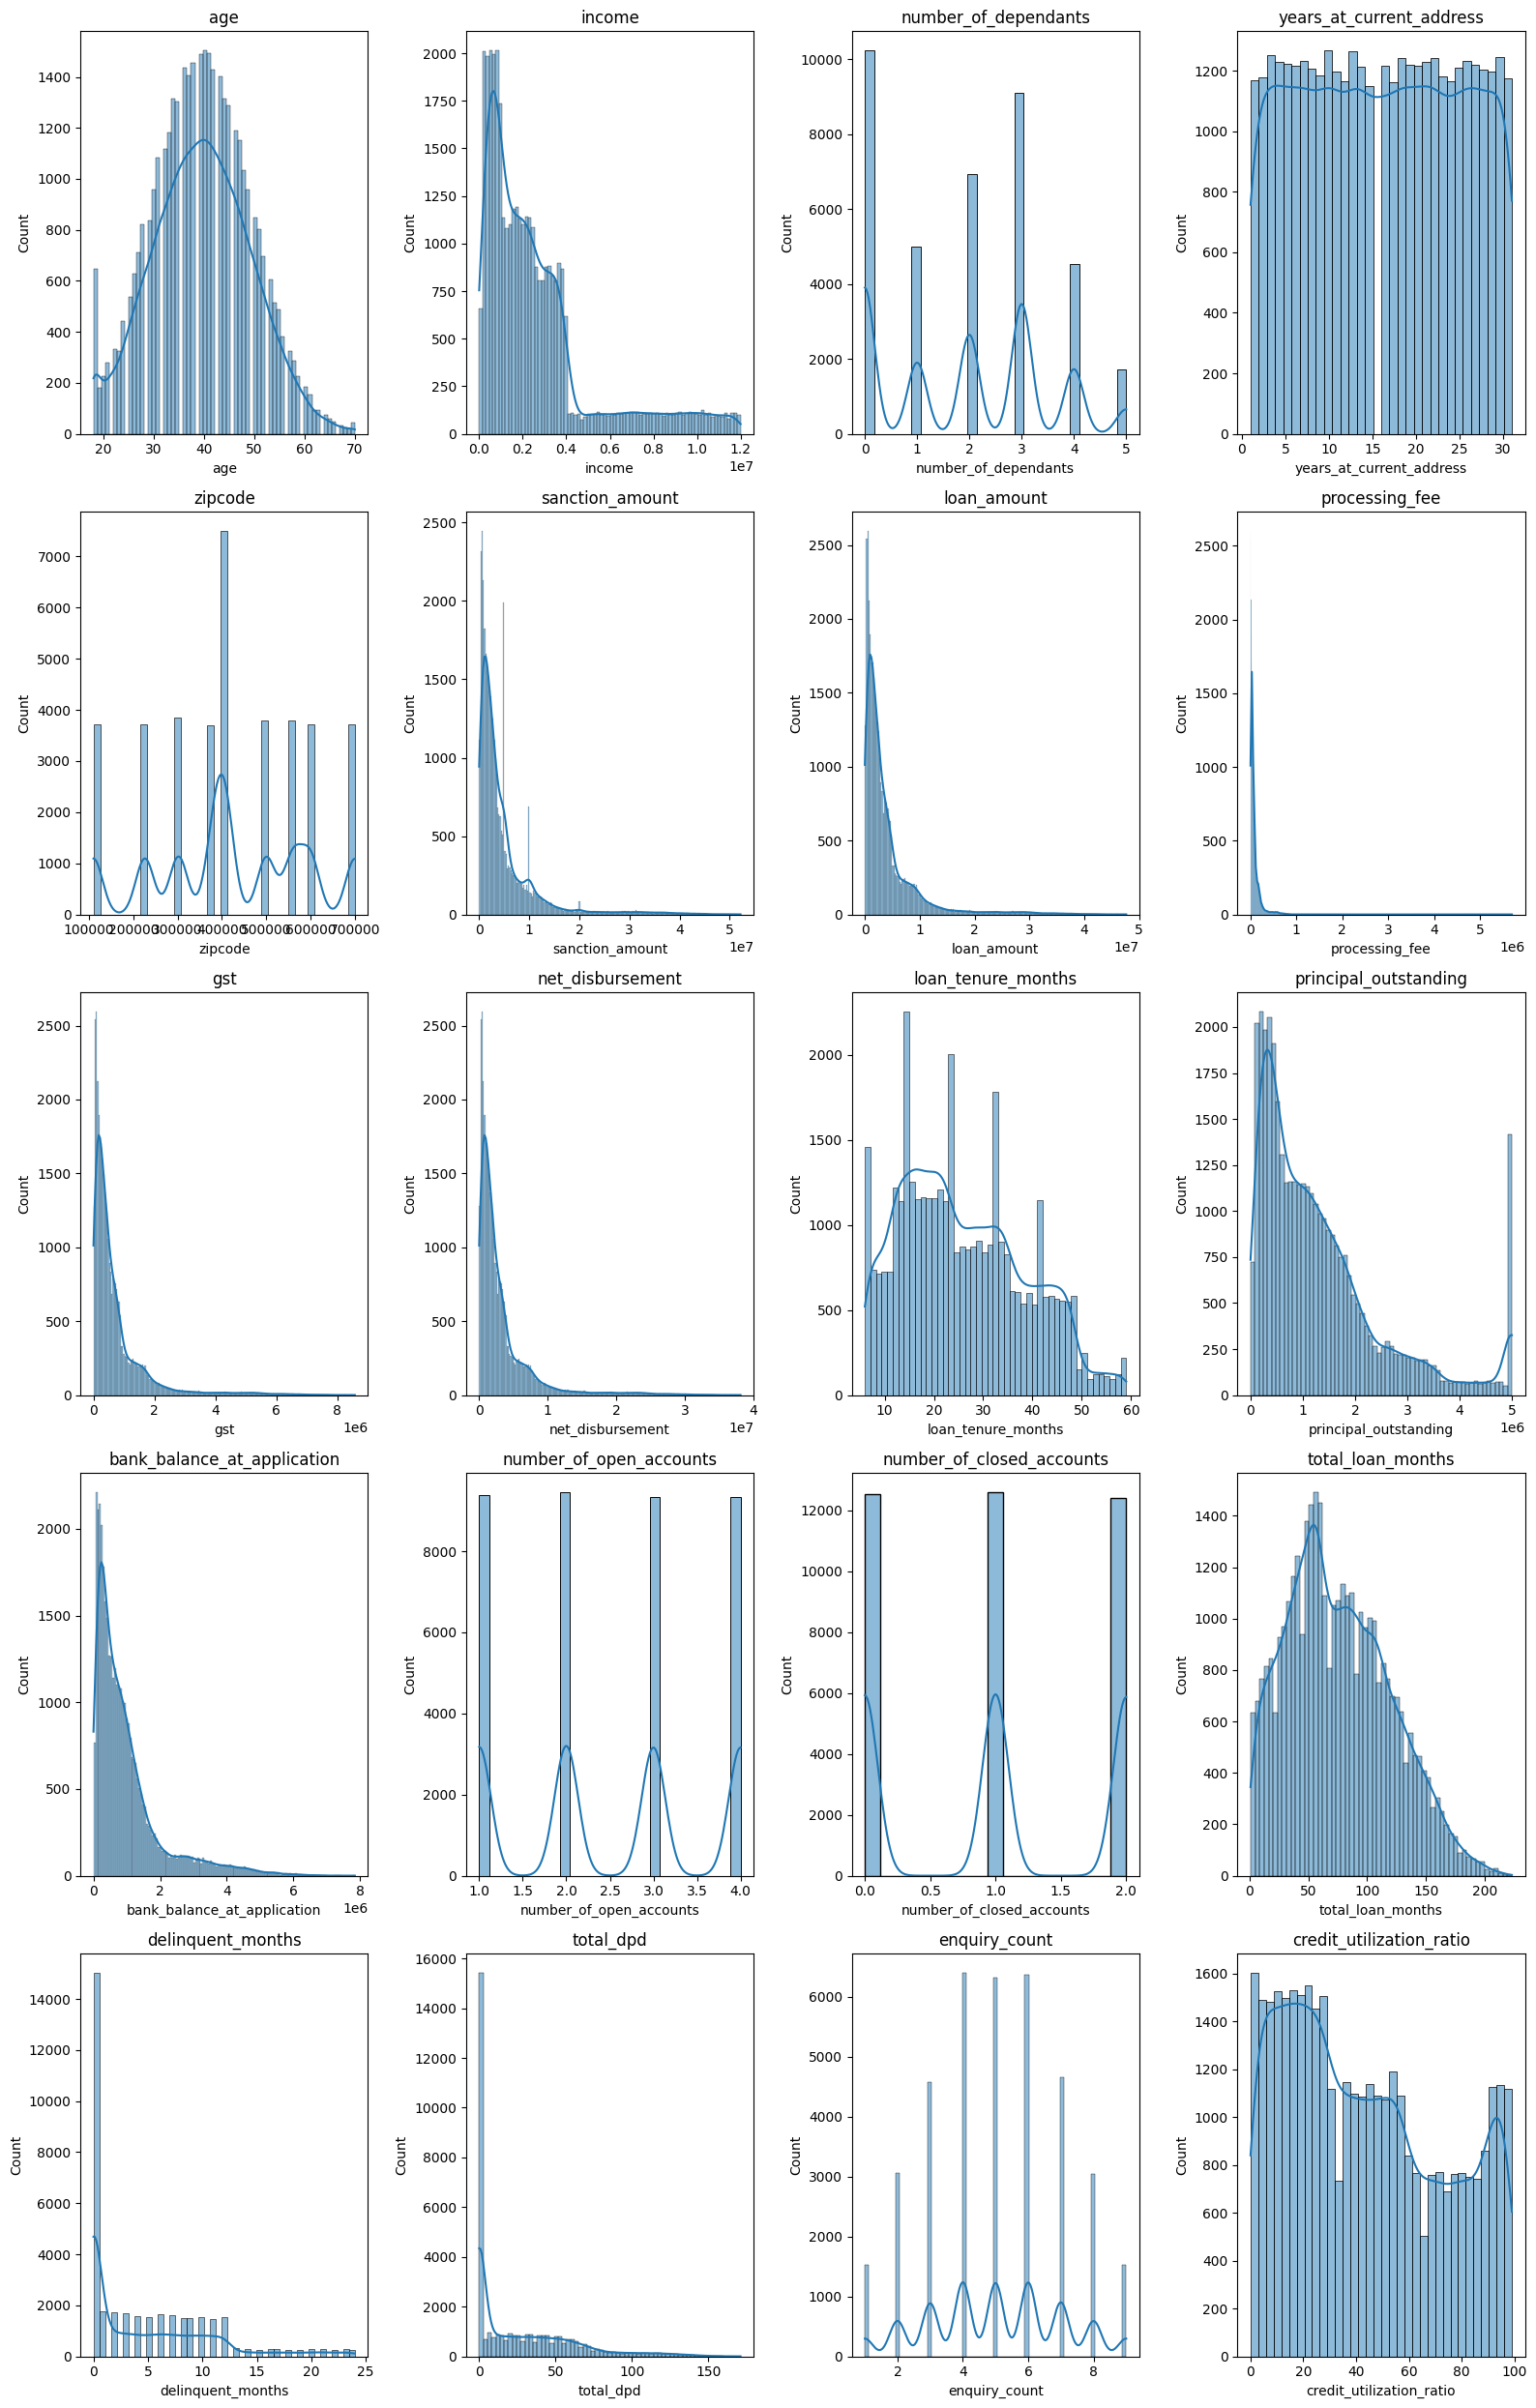

In [26]:
n_cols = 4
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Set up the matplotlib figure
plt.figure(figsize=(16, 5 * n_rows))

# Loop through the continuous columns and create a box plot for each
for i, column in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each column
    sns.histplot(x=df_train[column], kde = True)  # Create boxplot
    plt.title(column)  # Set title for each subplot
    plt.xlabel(column)  # Set x-label

# Adjust layout
plt.tight_layout()
plt.show()

In [27]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][['processing_fee', 'loan_amount']]

,processing_fee,loan_amount
23981,2.669791e+06,2234000
9898,5.293544e+06,3626000
47089,1.858965e+06,1738000
33705,5.678021e+06,3812000
12294,5.698030e+06,4639000
28174,1.214493e+06,966000
29305,3.036378e+06,2616000


In [28]:
df_train1 = df_train[(df_train.processing_fee/df_train.loan_amount)<=0.03].copy()
df_test = df_test[(df_test.processing_fee/df_test.loan_amount)<=0.03].copy()

In [29]:
for col in categorical_columns:
    print(col, "-->", df_train1[col].unique())

default --> [0 1]
gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state --> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
loan_id --> ['L27435' 'L13401' 'L00884' ... 'L38159' 'L00861' 'L15796']
loan_purpose --> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']


In [30]:
df_train1['loan_purpose'] = df_train1['loan_purpose'].replace('Personaal', 'Personal')
df_train1['loan_purpose'].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

In [31]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'].unique()

array(['Education', 'Home', 'Auto', 'Personal'], dtype=object)

## Bivariate Analysis

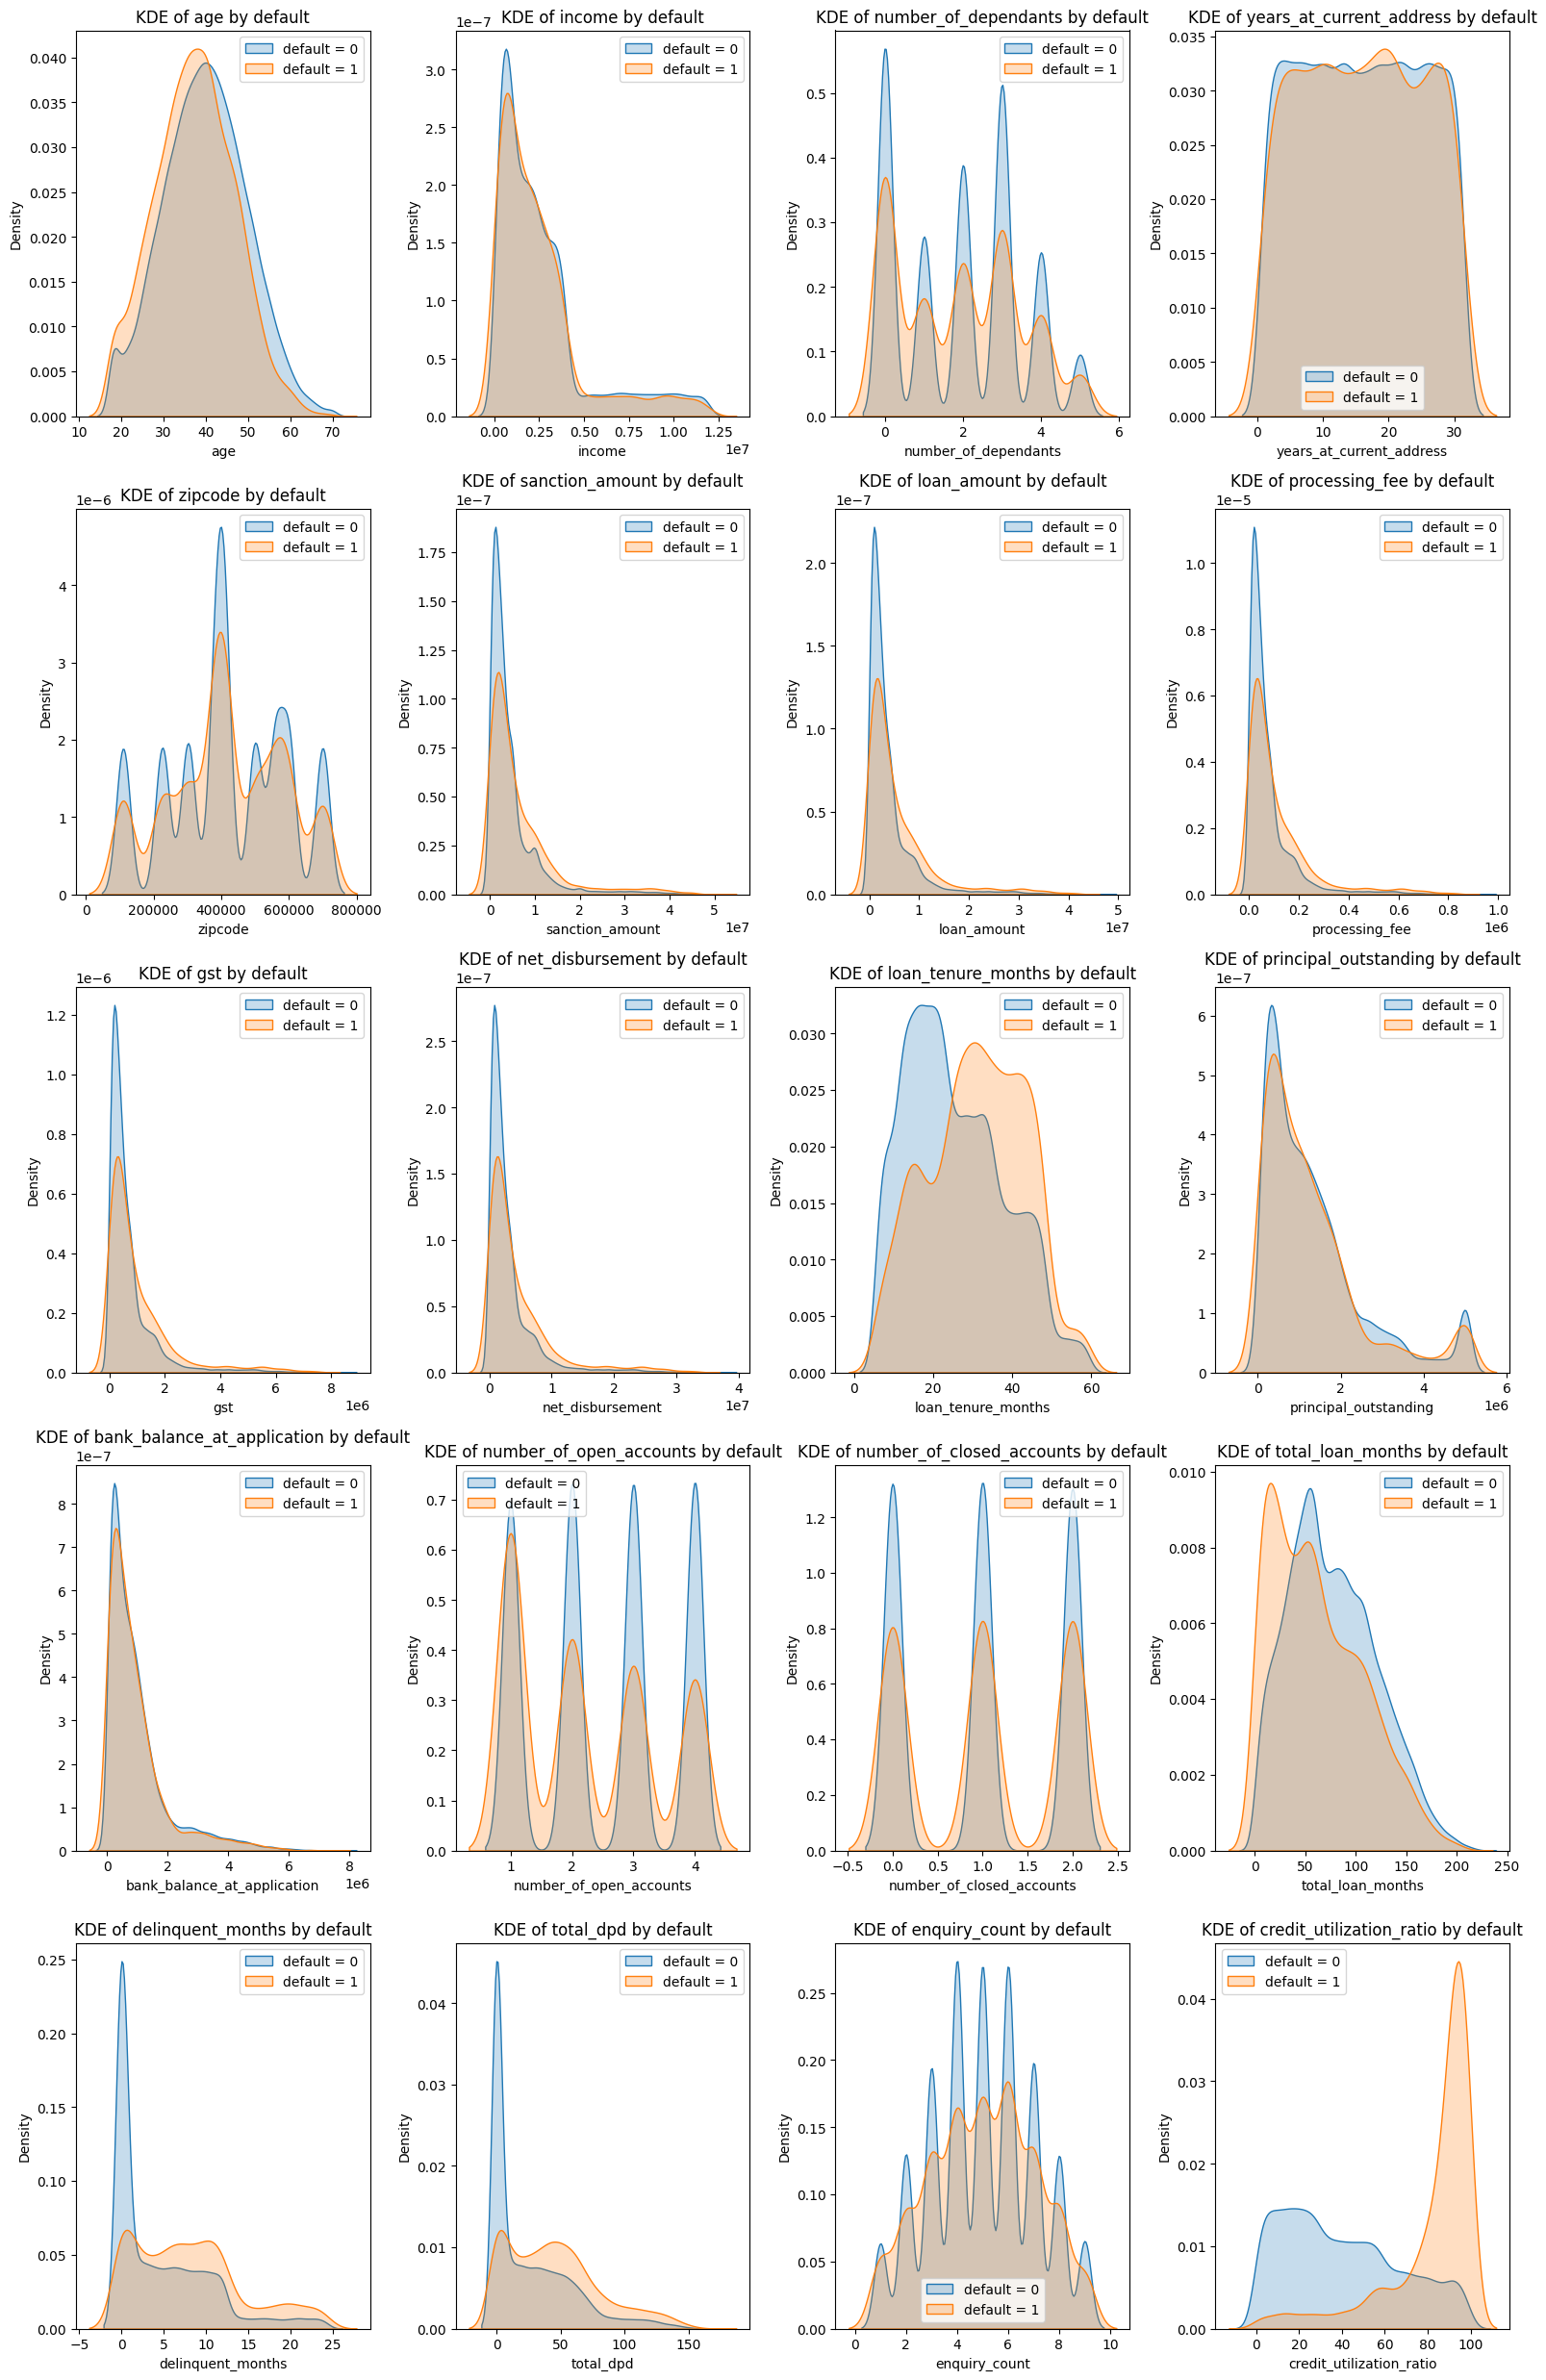

In [32]:
n_cols = 4
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed
plt.figure(figsize=(16, 5 * n_rows))

# Loop through the continuous columns and create a KDE plot for each
for i, column in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each column
    sns.kdeplot(df_train1[df_train1['default'] == 0][column], fill=True, label='default = 0')
    sns.kdeplot(df_train1[df_train1['default'] == 1][column], fill=True, label='default = 1')
    plt.title(f'KDE of {column} by default')  # Set title for each subplot
    plt.xlabel(column)  # Set x-label
    plt.ylabel('Density')  # Set y-label
    plt.legend()  # Add legend to each subplot

# Adjust layout
plt.tight_layout()
plt.show()

<h2 align = 'center' style='color:blue'>Feature Engineering</h2>

In [33]:
df_train1.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,0
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,0
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-08-25,2019-09-19,2,1,83,14,78,4,83,0


In [34]:
df_test.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
33553,C33554,36,F,Married,Self-Employed,3373000,3,Owned,15,Hyderabad,...,2022-11-30,2022-12-21,2,2,70,3,27,5,12,0
9427,C09428,33,F,Single,Salaried,2725000,0,Owned,15,Jaipur,...,2020-07-02,2020-07-15,4,0,115,0,0,9,85,0
199,C00200,28,M,Single,Self-Employed,1071000,0,Owned,19,Delhi,...,2019-07-31,2019-08-02,4,1,144,0,0,4,72,0


Features to Create :
1. Loan to income ratio
2. Delinquent months to loan months
3. total dpd to Delinquent months

In [35]:
df_train1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [36]:
df_train1['loan_to_income_ratio'] = (df_train1['loan_amount']/df_train1['income']).round(1)
df_test['loan_to_income_ratio'] = (df_test['loan_amount']/df_test['income']).round(1)
df_train1['loan_to_income_ratio'].describe()

count    37487.000000
mean         1.554928
std          0.973509
min          0.300000
25%          0.800000
50%          1.200000
75%          2.500000
max          4.600000
Name: loan_to_income_ratio, dtype: float64

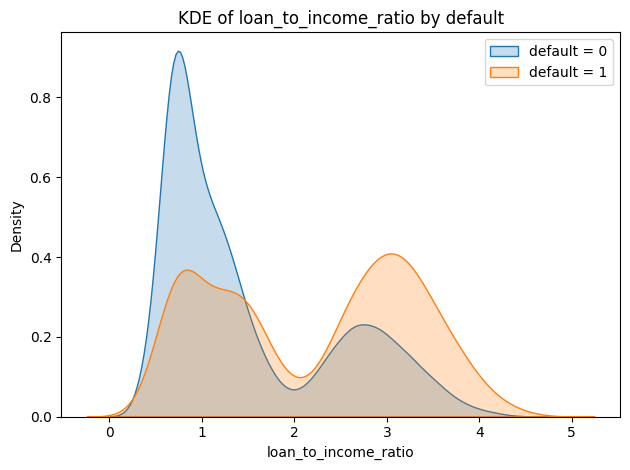

In [37]:

    sns.kdeplot(df_train1[df_train1['default'] == 0]['loan_to_income_ratio'], fill=True, label='default = 0')
    sns.kdeplot(df_train1[df_train1['default'] == 1]['loan_to_income_ratio'], fill=True, label='default = 1')
    plt.title(f'KDE of loan_to_income_ratio by default')  # Set title for each subplot
    plt.xlabel('loan_to_income_ratio')  # Set x-label
    plt.ylabel('Density')  # Set y-label
    plt.legend()  # Add legend to each subplot

# Adjust layout
plt.tight_layout()
plt.show()

In [38]:
df_train1['del_months_to_loan_months'] = (df_train1['delinquent_months']*100/df_train1['total_loan_months']).round(1)
df_test['del_months_to_loan_months'] = (df_test['delinquent_months']*100/df_test['total_loan_months']).round(1)
df_train1['del_months_to_loan_months'].describe()

count    37487.000000
mean        10.394331
std         17.268641
min          0.000000
25%          0.000000
50%          3.800000
75%         13.100000
max        100.000000
Name: del_months_to_loan_months, dtype: float64

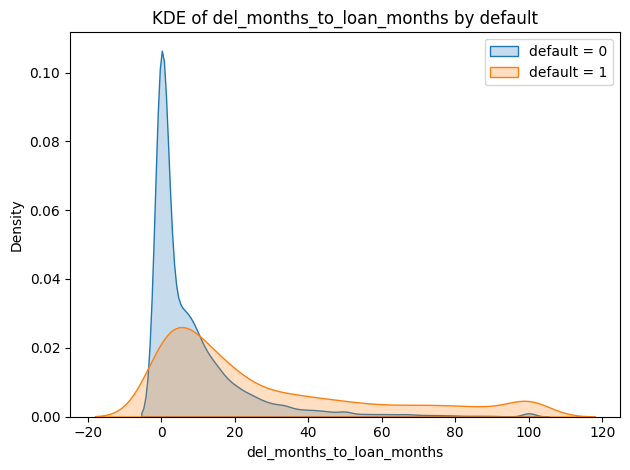

In [39]:
    sns.kdeplot(df_train1[df_train1['default'] == 0]['del_months_to_loan_months'], fill=True, label='default = 0')
    sns.kdeplot(df_train1[df_train1['default'] == 1]['del_months_to_loan_months'], fill=True, label='default = 1')
    plt.title(f'KDE of del_months_to_loan_months by default')  # Set title for each subplot
    plt.xlabel('del_months_to_loan_months')  # Set x-label
    plt.ylabel('Density')  # Set y-label
    plt.legend()  # Add legend to each subplot

# Adjust layout
plt.tight_layout()
plt.show()

In [40]:
df_train1['avg_dpd_per_delinquency'] = np.where(
    df_train1['delinquent_months'] != 0,
    (df_train1['total_dpd']/df_train1['delinquent_months']).round(1),
    0) 
df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd']/df_test['delinquent_months']).round(1),
    0)
df_train1['avg_dpd_per_delinquency'].describe()

count    37487.000000
mean         3.294403
std          2.903256
min          0.000000
25%          0.000000
50%          4.300000
75%          5.800000
max         10.000000
Name: avg_dpd_per_delinquency, dtype: float64

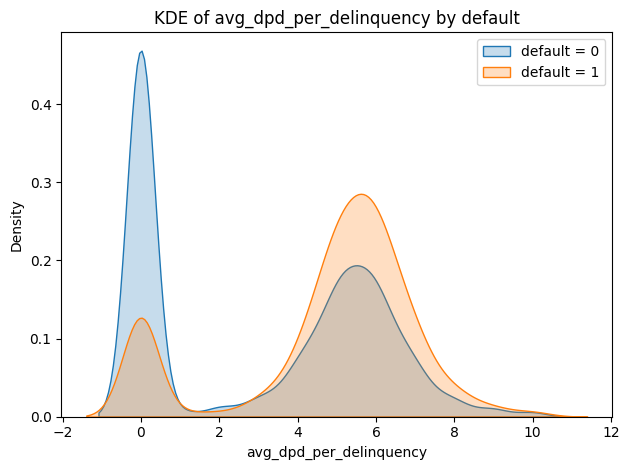

In [41]:
    sns.kdeplot(df_train1[df_train1['default'] == 0]['avg_dpd_per_delinquency'], fill=True, label='default = 0')
    sns.kdeplot(df_train1[df_train1['default'] == 1]['avg_dpd_per_delinquency'], fill=True, label='default = 1')
    plt.title(f'KDE of avg_dpd_per_delinquency by default')  # Set title for each subplot
    plt.xlabel('avg_dpd_per_delinquency')  # Set x-label
    plt.ylabel('Density')  # Set y-label
    plt.legend()  # Add legend to each subplot

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
df_train1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income_ratio', 'del_months_to_loan_months',
       'avg_dpd_per_delinquency'],
      dtype='object')

## Feature Selection

In [43]:
df_train1 = df_train1.drop(['cust_id','loan_id'],axis = 'columns')
df_test = df_test.drop(['cust_id','loan_id'],axis = 'columns')

In [44]:
df_train1.columns

Index(['age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'del_months_to_loan_months', 'avg_dpd_per_delinquency'],
      dtype='object')

In [45]:
df_train2 = df_train1.drop(['sanction_amount','loan_amount','disbursal_date','installment_start_dt','total_loan_months', 'delinquent_months', 'total_dpd','income'],axis = 'columns')
df_test = df_test.drop(['sanction_amount','loan_amount','disbursal_date','installment_start_dt','total_loan_months', 'delinquent_months', 'total_dpd'],axis = 'columns')

In [46]:
cols_to_scale =['age','number_of_dependants', 'years_at_current_address',
       'zipcode', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio',
       'loan_to_income_ratio', 'del_months_to_loan_months',
       'avg_dpd_per_delinquency']

In [47]:
from sklearn.preprocessing import MinMaxScaler
X_train = df_train2.drop('default', axis = 'columns')
y_train = df_train2['default']
scaler = MinMaxScaler()

# Fit and transform the data
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,del_months_to_loan_months,avg_dpd_per_delinquency
count,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000
mean,0.414681,0.388476,0.499787,0.523326,0.083030,0.083030,0.083030,0.375431,0.261931,0.123683,0.498795,0.498386,0.500410,0.437656,0.291844,0.103943,0.329440
std,0.189510,0.307163,0.297939,0.286165,0.113437,0.113437,0.113437,0.234410,0.244515,0.133507,0.372407,0.407528,0.252997,0.296517,0.226397,0.172686,0.290326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.019100,0.019100,0.019100,0.188679,0.078179,0.034088,0.000000,0.000000,0.375000,0.181818,0.116279,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.491525,0.045887,0.045887,0.045887,0.339623,0.194385,0.082720,0.333333,0.500000,0.500000,0.393939,0.209302,0.038000,0.430000
75%,0.538462,0.600000,0.766667,0.762712,0.095512,0.095512,0.095512,0.547170,0.353152,0.155525,0.666667,1.000000,0.625000,0.676768,0.511628,0.131000,0.580000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
X_test = df_test.drop('default', axis = 'columns')
y_test = df_test['default']
# Fit and transform the data
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,del_months_to_loan_months,avg_dpd_per_delinquency
count,12498.000000,1.249800e+04,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000
mean,0.413678,2.655850e+06,0.386174,0.503088,0.525588,0.082764,0.082764,0.082764,0.378690,0.263201,0.124546,0.503681,0.506961,0.503471,0.439030,0.292255,0.104141,0.330698
std,0.189011,2.645328e+06,0.306940,0.296372,0.287152,0.111372,0.111372,0.111372,0.235128,0.245299,0.134018,0.374460,0.405600,0.255602,0.296583,0.225206,0.173989,0.290731
min,0.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000126,0.000126,0.000126,0.000000,-0.000163,0.000216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,8.050000e+05,0.000000,0.233333,0.325424,0.019725,0.019725,0.019725,0.188679,0.078853,0.034518,0.000000,0.000000,0.375000,0.181818,0.116279,0.000000,0.000000
50%,0.423077,1.916500e+06,0.400000,0.500000,0.510169,0.046244,0.046244,0.046244,0.358491,0.195309,0.083575,0.666667,0.500000,0.500000,0.393939,0.209302,0.038000,0.430000
75%,0.538462,3.336750e+06,0.600000,0.766667,0.762712,0.096693,0.096693,0.096693,0.547170,0.354632,0.156611,1.000000,1.000000,0.750000,0.676768,0.511628,0.129000,0.577500
max,1.000000,1.199000e+07,1.000000,1.000000,1.000000,1.003192,1.003192,1.003192,1.000000,1.000000,0.879450,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data['feature'] = dataframe.columns
    vif_data['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Calculate VIF
vif_df = calculate_vif(X_train[cols_to_scale])
vif_df

C:\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,age,5.704164
1,number_of_dependants,2.731687
2,years_at_current_address,3.423982
3,zipcode,3.793047
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.060848
8,principal_outstanding,16.211278
9,bank_balance_at_application,9.282922


In [50]:
features_to_drop = ['processing_fee','gst','net_disbursement','principal_outstanding','bank_balance_at_application']

In [51]:
X_train = X_train.drop(features_to_drop, axis = 'columns')

In [52]:
new_cols = X_train.select_dtypes(['int64','float64']).columns
new_cols

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'del_months_to_loan_months', 'avg_dpd_per_delinquency'],
      dtype='object')

In [53]:
vif_df = calculate_vif(X_train[new_cols])
vif_df

,feature,VIF
0,age,5.387248
1,number_of_dependants,2.726704
2,years_at_current_address,3.392533
3,zipcode,3.757209
4,loan_tenure_months,5.958519
5,number_of_open_accounts,4.319585
6,number_of_closed_accounts,2.345916
7,enquiry_count,6.351497
8,credit_utilization_ratio,2.907580
9,loan_to_income_ratio,4.524120


In [54]:
selected_features_vif = vif_df.feature.values
selected_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'del_months_to_loan_months', 'avg_dpd_per_delinquency'],
      dtype=object)

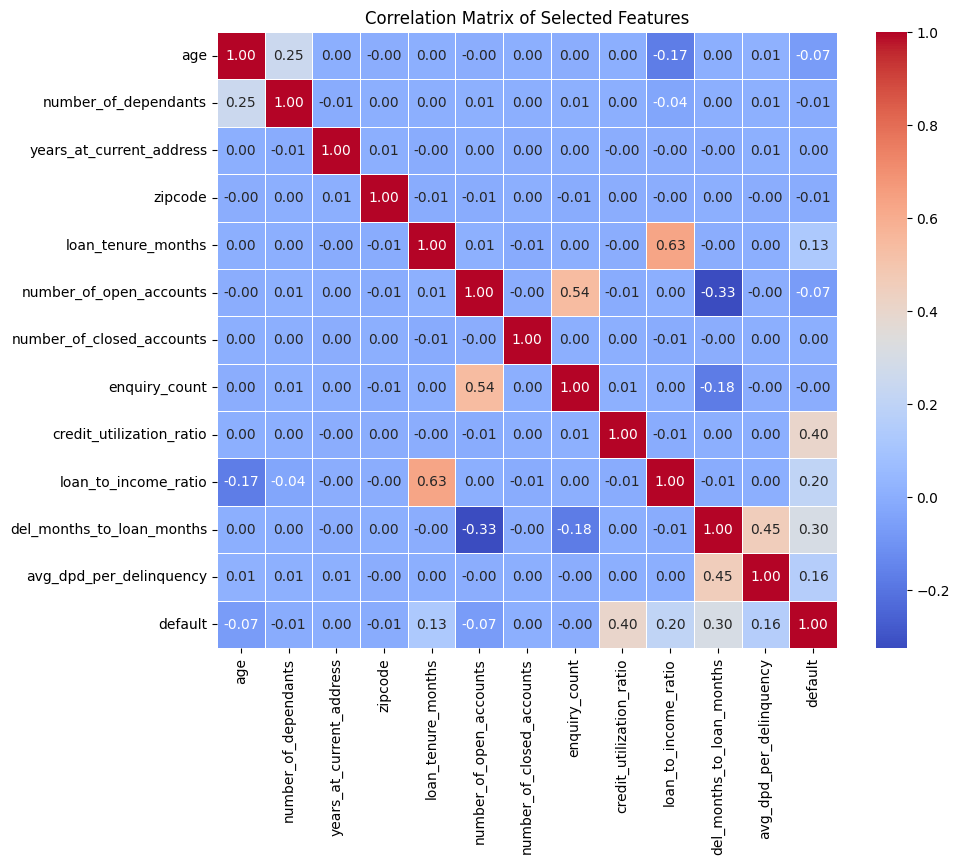

In [55]:

plt.figure(figsize=(10, 8))
correlation_matrix = df_train2[new_cols.append(pd.Index(['default']))].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt = '0.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()

## Caculate WOE and IV

In [56]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.098463,0.207680,-0.746312,0.081509
Education,5626,546,5080,0.171214,0.148114,0.144932,0.003348
Home,11271,1744,9527,0.546880,0.277771,0.677431,0.182303
Personal,13153,585,12568,0.183443,0.366435,-0.691918,0.126616


In [57]:
iv_values = {}

for feature in X_train.columns:
    if X_train[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'zipcode': np.float64(0.0007436024782513755),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.4228228499400095),
 'loan_to_income_ratio': np.float64(0.4901314263705459),
 'del_months_to_loan_months': np.float64(0.67832

In [58]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
16,credit_utilization_ratio,2.423
18,del_months_to_loan_months,0.678
17,loan_to_income_ratio,0.490
19,avg_dpd_per_delinquency,0.421
10,loan_purpose,0.394
5,residence_type,0.259
12,loan_tenure_months,0.235
11,loan_type,0.173
0,age,0.076
13,number_of_open_accounts,0.073


In [59]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income_ratio',
 'del_months_to_loan_months',
 'avg_dpd_per_delinquency']

In [60]:
X_train_reduced = X_train[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [61]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,del_months_to_loan_months,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.340,1.000,0.596,0.605,0.067,0.550,True,False,False,True,False,False
13400,0.212,0.509,0.667,0.929,0.186,0.034,0.420,True,False,False,False,False,False
883,0.615,0.245,0.333,0.838,0.093,0.169,0.560,False,False,False,False,True,True


<h2 align = 'center' style = 'color : blue'>Model Training</h2>

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.70      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



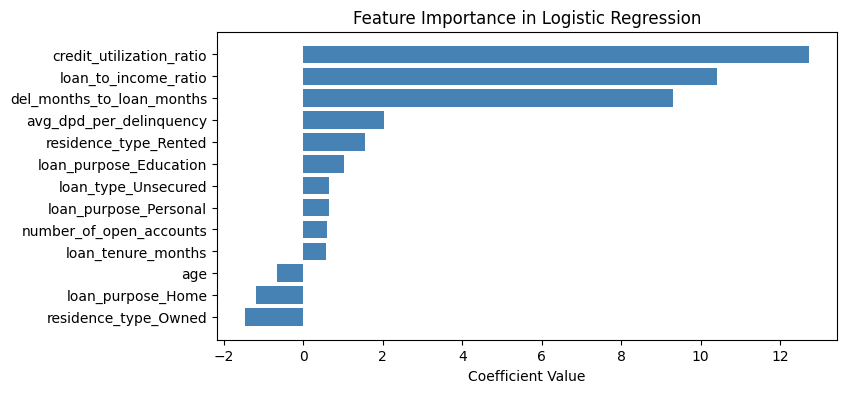

In [63]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()


In [64]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.85      0.70      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [65]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11390
           1       0.83      0.75      0.79      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.87      0.88     12498
weighted avg       0.96      0.96      0.96     12498



#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [66]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search_l = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search_l.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search_l.best_params_}")
print(f"Best Score: {random_search_l.best_score_}")

best_model = random_search_l.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': np.float64(1438.44988828766)}
Best Score: 0.7626507623034325
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



#### RandomizedSearch CV for Attempt 1: XGBoost

In [67]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [4, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'scale_pos_weight': [1, 2],
    'reg_alpha': [0.0, 0.01],
    'reg_lambda': [0.0, 0.01],
    'tree_method': ['hist']  # Use CPU for training
}

xgb = XGBClassifier(eval_metric='logloss', tree_method='hist')  # Updated initialization

random_search = RandomizedSearchCV(
    estimator=xgb, 
    param_distributions=param_dist, 
    n_iter=20,  # Reduced number of iterations
    scoring='f1', 
    cv=5, 
    verbose=2, 
    n_jobs=-1, 
    random_state=42,
    error_score='raise'
)

# Fit the model
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'tree_method': 'hist', 'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best Score: 0.7918688222060485
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.81      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [68]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [69]:
model_logistic = LogisticRegression(**random_search_l.best_params_)
model_logistic.fit(X_train_res, y_train_res)

y_pred = model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.95      0.70      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [70]:
model_xgb = XGBClassifier(**random_search.best_params_)
model_xgb.fit(X_train_res, y_train_res)

y_pred = model_xgb.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11390
           1       0.53      0.98      0.69      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.95      0.82     12498
weighted avg       0.96      0.92      0.93     12498



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [71]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34228
1    34228
Name: count, dtype: int64

In [72]:
model_logistic_1 = LogisticRegression(**random_search_l.best_params_)
model_logistic_1.fit(X_train_smt, y_train_smt)

y_pred = model_logistic_1.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [73]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from optuna.samplers import TPESampler

In [74]:
def objective(trial):
    # Define the hyperparameter space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),
    }

    # Create the model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **param)

    # Evaluate the model using cross-validation and average F1 score
    f1 = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=5, scoring=f1)

    # Return the mean score
    return scores.mean()
# Create a study
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=50, n_jobs=-1)

[I 2024-10-12 12:19:19,391] A new study created in memory with name: no-name-8c50b4a9-5442-43d4-911b-d96609465cca
C:\Users\zahee\AppData\Local\Temp\ipykernel_19428\2335131164.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\zahee\AppData\Local\Temp\ipykernel_19428\2335131164.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\zahee\AppData\Local\Temp\ipykernel_19428\2335131164.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/o

In [75]:
# Print the best parameters and best score
print(f"Best Parameters: {study.best_params}")
print(f"Best Score: {study.best_value}")

# Train the best model on the entire training set
best_model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **study.best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate the model on the test set
from sklearn.metrics import classification_report

y_pred = best_model_xgb.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:20:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'n_estimators': 199, 'max_depth': 6, 'learning_rate': 0.09854671934871709, 'subsample': 0.8278290997947583, 'colsample_bytree': 0.6960633702321612}
Best Score: 0.9756549742975796
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11390
           1       0.74      0.86      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.86      0.92      0.89     12498
weighted avg       0.96      0.96      0.96     12498



In [76]:
def objective(trial):
    # Define the hyperparameter space without 'none'
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
    
    # Set the solver based on the penalty
    if penalty == 'elasticnet':
        solver = 'saga'  # Elastic net requires saga solver
    else:
        solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])

    param = {
        'penalty': penalty,
        'C': trial.suggest_loguniform('C', 1e-4, 10.0),
        'solver': solver,
    }

    # Handle l1_ratio conditionally
    if penalty == 'elasticnet':
        param['l1_ratio'] = trial.suggest_float('l1_ratio', 0.0, 1.0)
    else:
        param['l1_ratio'] = None  # or choose a default value if needed

    # Create the model
    model = LogisticRegression(
        penalty=param['penalty'],
        C=param['C'],
        solver=param['solver'],
        l1_ratio=param['l1_ratio'],
        max_iter=10000
    )

    # Evaluate the model using cross-validation and average F1 score
    f1 = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=5, scoring=f1)

    # Return the mean score
    return scores.mean()

# Create a study
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=50, n_jobs=-1)


[I 2024-10-12 12:20:22,839] A new study created in memory with name: no-name-101f6b28-512b-4e04-b535-4580f0237e13
C:\Users\zahee\AppData\Local\Temp\ipykernel_19428\2972649102.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-4, 10.0),
C:\Users\zahee\AppData\Local\Temp\ipykernel_19428\2972649102.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-4, 10.0),
C:\Users\zahee\AppData\Local\Temp\ipykernel_19428\2972649102.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugge

In [77]:
# Print the best parameters and best score
print(f"Best Parameters: {study.best_params}")
print(f"Best Score: {study.best_value}")

# Train the best model on the entire training set
best_params = study.best_params
best_params['l1_ratio'] = best_params.get('l1_ratio', None)  # Set l1_ratio to None if not present

best_model_logistic = LogisticRegression(**best_params, max_iter=10000)
best_model_logistic.fit( X_train_smt, y_train_smt)

# Evaluate the model on the test set
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.11398321581903481}
Best Score: 0.9448225761477612
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.81      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



In [78]:
# model_logistic_1
y_pred = model_logistic_1.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [79]:
from sklearn.metrics import roc_curve, auc

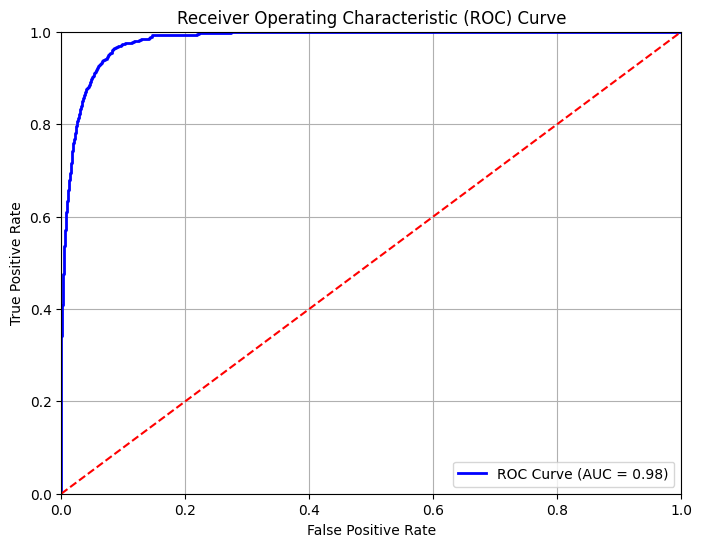

In [80]:
y_prob = model_logistic_1.predict_proba(X_test_encoded)[:, 1]  # Get probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # True positive rate and false positive rate
roc_auc = auc(fpr, tpr)  # Area under the curve


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [86]:
gini_coef = 2*roc_auc-1
gini_coef

np.float64(0.965927582305081)

In [81]:
probabilities = model_logistic_1.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

df_decile.head()

C:\Users\zahee\AppData\Local\Temp\ipykernel_19428\2816372642.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,0.824,1.000,912.000,338.000,72.960,27.040,912.000,338.000,82.310,2.968,79.343
1,0.204,0.824,174.000,1076.000,13.920,86.080,1086.000,1414.000,98.014,12.414,85.600
2,0.032,0.204,19.000,1231.000,1.520,98.480,1105.000,2645.000,99.729,23.222,76.507
3,0.005,0.032,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170,65.739
4,0.001,0.005,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136,54.864


<h2 align = 'center' style = 'color:blue'>Finalize The Model and Visualize Feature Importance</h2>

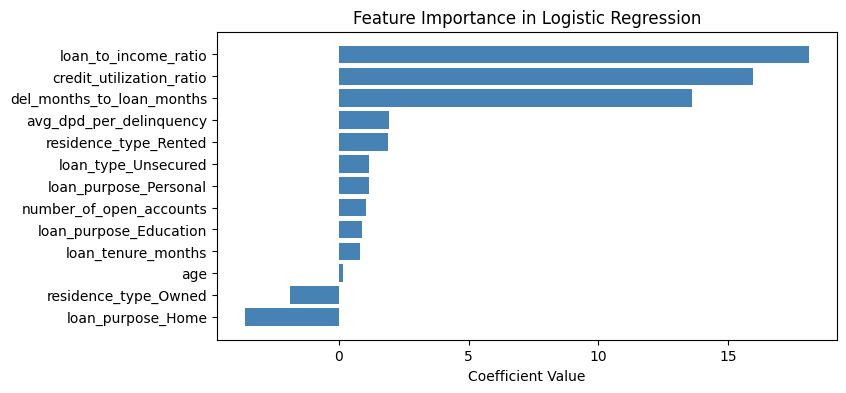

In [82]:
final_model = model_logistic_1
feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()


In [83]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'del_months_to_loan_months', 'avg_dpd_per_delinquency',
       'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured'],
      dtype='object')

In [84]:
cols_to_scale

['age',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'loan_to_income_ratio',
 'del_months_to_loan_months',
 'avg_dpd_per_delinquency']

In [85]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'Artifacts/model_data.joblib')

['Artifacts/model_data.joblib']